In [78]:
# Import our dependencies
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
import numpy as np

In [79]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from pathlib import Path

In [80]:
bb_players = "combined_ncaa_player_stats.csv"
df = pd.read_csv(bb_players)
df

,url,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,/cbb/players/menghe-anyam-1.html,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,6-5,2.2,2.4,-4.15,3.0,0
1,/cbb/players/jordan-aaberg-1.html,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,6-9,1.6,3.5,-3.07,2.3,0
2,/cbb/players/karl-aaker-1.html,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,6-5,2.3,4.1,1.37,2.0,0
3,/cbb/players/steve-aaker-1.html,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,6-5,3.0,6.2,3.05,5.1,0
4,/cbb/players/waine-aalto-1.html,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,5-10,1.1,3.1,1.63,1.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109656,/cbb/players/lou-zykiewicz-1.html,Lou Zykiewicz,2.7,0.333,0.9,1.8,0.750,1.3,9.0,NaN,NaN,3.1,-4.16,NaN,0
109657,/cbb/players/jack-zyla-1.html,Jack Zyla,7.7,0.400,3.1,1.2,0.630,0.8,65.0,NaN,1.7,7.0,-12.74,2.0,0
109658,/cbb/players/michal-zylinski-1.html,Michal Zylinski,1.5,0.333,0.5,0.0,NaN,0.0,2.0,6-4,0.5,1.5,-6.49,0.5,0
109659,/cbb/players/brock-zylstra-1.html,Brock Zylstra,4.1,0.429,1.8,1.1,0.674,0.7,119.0,6-6,1.3,5.1,3.51,2.8,0


In [81]:
#drop url column
df = df.drop(columns=['url'])

In [82]:
df = df.dropna()
df.head(5)

,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,6-5,2.2,2.4,-4.15,3.0,0
1,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,6-9,1.6,3.5,-3.07,2.3,0
2,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,6-5,2.3,4.1,1.37,2.0,0
3,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,6-5,3.0,6.2,3.05,5.1,0
4,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,5-10,1.1,3.1,1.63,1.5,0


In [6]:
#convert height change nan to zero
#df["height"]= df["height"].fillna('0-0')

In [83]:
#change height into inches 
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("-")
    ft_ = float(ht_[0])
    in_ = float(ht_[1])
    return (12*ft_) + in_
    df["height"] = df["height"].apply(parse_ht(ht))
print (df["height"].apply(lambda x:parse_ht(x)))

0         77.0
1         81.0
2         77.0
3         77.0
4         70.0
          ... 
109650    80.0
109652    81.0
109654    87.0
109659    78.0
109660    80.0
Name: height, Length: 78170, dtype: float64


In [84]:
df["height"] = df["height"].apply(lambda x:parse_ht(x))
df.head()

,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,77.0,2.2,2.4,-4.15,3.0,0
1,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,81.0,1.6,3.5,-3.07,2.3,0
2,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,77.0,2.3,4.1,1.37,2.0,0
3,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,77.0,3.0,6.2,3.05,5.1,0
4,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,70.0,1.1,3.1,1.63,1.5,0


In [85]:
# drop rows with nan values
df= df.dropna(0)

In [86]:
df.head(5)

,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,77.0,2.2,2.4,-4.15,3.0,0
1,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,81.0,1.6,3.5,-3.07,2.3,0
2,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,77.0,2.3,4.1,1.37,2.0,0
3,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,77.0,3.0,6.2,3.05,5.1,0
4,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,70.0,1.1,3.1,1.63,1.5,0


In [87]:
#split data set in half to use first half to train model and second half to test our prediction 
train = df.iloc[:38334]
test = df.iloc[38334:]

In [88]:
train.head()

,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
0,Menghe a'Nyam,2.1,0.414,0.9,1.2,0.529,0.7,41.0,77.0,2.2,2.4,-4.15,3.0,0
1,Jordan Aaberg,2.3,0.619,1.5,0.7,0.788,0.6,115.0,81.0,1.6,3.5,-3.07,2.3,0
2,Karl Aaker,4.0,0.346,1.4,0.6,0.611,0.4,92.0,77.0,2.3,4.1,1.37,2.0,0
3,Steve Aaker,6.1,0.415,2.5,2.3,0.500,1.2,52.0,77.0,3.0,6.2,3.05,5.1,0
4,Waine Aalto,2.4,0.542,1.3,1.0,0.500,0.5,10.0,70.0,1.1,3.1,1.63,1.5,0


In [89]:
test.head()

,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
53503,Keith Kessinger,1.9,0.446,0.9,0.8,0.758,0.6,43.0,74.0,0.5,2.7,8.94,0.4,0
53504,Alec Kessler,10.0,0.499,5.0,5.9,0.763,4.5,123.0,83.0,2.7,14.5,6.91,7.3,1
53505,Bob Kessler,14.6,0.390,5.7,7.6,0.659,5.0,76.0,76.0,2.7,16.4,-1.70,12.5,0
53506,Chad Kessler,4.4,0.527,2.3,2.3,0.714,1.6,108.0,80.0,1.9,6.3,7.80,3.3,0
53507,Dave Kessler,2.7,0.406,1.1,0.6,0.857,0.5,12.0,76.0,0.1,2.7,-1.99,1.6,0


In [90]:
#assign data to X and Y
#using the features against the is_pro model

X =train[['fgapg','fgpct','fgpg','ftapg','ftpct','ftpg','games','height','pfpg','ptspg','sospg','trbpg']]
y = train['is_pro'].astype(int)

In [91]:
print("Shape: ", X.shape, y.shape)

Shape:  (38334, 12) (38334,)


In [92]:
#split data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

<b>Random Forest<b>

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

Feature: 0, Score: 0.06191
Feature: 1, Score: 0.07606
Feature: 2, Score: 0.07866
Feature: 3, Score: 0.06335
Feature: 4, Score: 0.05982
Feature: 5, Score: 0.06119
Feature: 6, Score: 0.08206
Feature: 7, Score: 0.06397
Feature: 8, Score: 0.04936
Feature: 9, Score: 0.11743
Feature: 10, Score: 0.22143
Feature: 11, Score: 0.06475


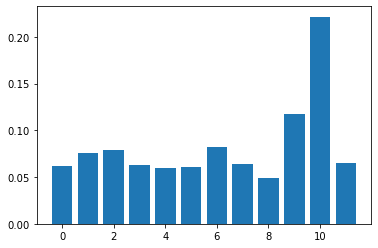

In [94]:
# define dataset
# Feautures and Predicted
X =train[['fgapg','fgpct','fgpg','ftapg','ftpct','ftpg','games','height','pfpg','ptspg','sospg','trbpg']]
y = train['is_pro'].astype(int)

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [95]:
# train the model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

<b>Shap<b>

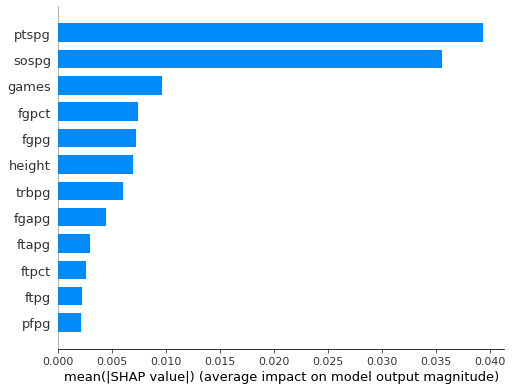

In [96]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [97]:
from sklearn.metrics import accuracy_score
# make predictions
outcome = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, outcome)
print(acc)

1.0


<b>Scaled Data<b> 

In [98]:
 # Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [99]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9677587646076795


In [100]:
test.head()

,name,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
53503,Keith Kessinger,1.9,0.446,0.9,0.8,0.758,0.6,43.0,74.0,0.5,2.7,8.94,0.4,0
53504,Alec Kessler,10.0,0.499,5.0,5.9,0.763,4.5,123.0,83.0,2.7,14.5,6.91,7.3,1
53505,Bob Kessler,14.6,0.390,5.7,7.6,0.659,5.0,76.0,76.0,2.7,16.4,-1.70,12.5,0
53506,Chad Kessler,4.4,0.527,2.3,2.3,0.714,1.6,108.0,80.0,1.9,6.3,7.80,3.3,0
53507,Dave Kessler,2.7,0.406,1.1,0.6,0.857,0.5,12.0,76.0,0.1,2.7,-1.99,1.6,0


In [101]:
known_outcomes = test.drop('name', axis=1)
names = test['name']
known_outcomes

,fgapg,fgpct,fgpg,ftapg,ftpct,ftpg,games,height,pfpg,ptspg,sospg,trbpg,is_pro
53503,1.9,0.446,0.9,0.8,0.758,0.6,43.0,74.0,0.5,2.7,8.94,0.4,0
53504,10.0,0.499,5.0,5.9,0.763,4.5,123.0,83.0,2.7,14.5,6.91,7.3,1
53505,14.6,0.390,5.7,7.6,0.659,5.0,76.0,76.0,2.7,16.4,-1.70,12.5,0
53506,4.4,0.527,2.3,2.3,0.714,1.6,108.0,80.0,1.9,6.3,7.80,3.3,0
53507,2.7,0.406,1.1,0.6,0.857,0.5,12.0,76.0,0.1,2.7,-1.99,1.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109650,3.6,0.475,1.7,1.4,0.630,0.9,116.0,80.0,2.5,4.3,0.50,3.8,0
109652,4.5,0.515,2.3,2.0,0.691,1.4,114.0,81.0,2.5,6.0,2.23,3.8,0
109654,6.1,0.501,3.0,1.2,0.696,0.9,120.0,87.0,1.9,7.0,11.47,5.0,0
109659,4.1,0.429,1.8,1.1,0.674,0.7,119.0,78.0,1.3,5.1,3.51,2.8,0


In [102]:
prediction = test
prediction = prediction.drop(columns=['name','is_pro'])

In [103]:
index_list = prediction.index.tolist()
output_list = []
counter = 0

for val in index_list:
    input_row = prediction.loc[val, :]
    input_list = [input_row]
    output = model.predict(input_list)
    #print(counter, output)
    #counter+=1
    output_list.append(output[0])
    
print('Done')


Done


In [104]:
prediction_results_df = pd.DataFrame(names)
is_pro_list = test['is_pro'].tolist()
correct_list = []

for j in range(0, len(is_pro_list)):
    if output_list[j] == is_pro_list[j]:
        correct_list.append('Yes')
    else:
        correct_list.append('No')

prediction_results_df['is_pro_actual'] = is_pro_list
prediction_results_df['is_pro_prediction'] = output_list
prediction_results_df['correct_prediction'] = correct_list
prediction_results_df

,name,is_pro_actual,is_pro_prediction,correct_prediction
53503,Keith Kessinger,0,0,Yes
53504,Alec Kessler,1,1,Yes
53505,Bob Kessler,0,0,Yes
53506,Chad Kessler,0,0,Yes
53507,Dave Kessler,0,0,Yes
...,...,...,...,...
109650,Mark Zwart,0,0,Yes
109652,Eric Zwayer,0,0,Yes
109654,Serge Zwikker,0,0,Yes
109659,Brock Zylstra,0,0,Yes


In [105]:
prediction_results_df['correct_prediction'].value_counts()

Yes    38533
No      1303
Name: correct_prediction, dtype: int64

In [106]:
prediction_results_df.to_csv('randomForest_model_results.csv', index=False)